# 산업수학 3조 발표자료

# 1. 경사 하강법(Gradient Descent)

1. 목표: 딥러닝 알고리즘 학습 시 예측값과 정답값 간의 차이인 손실 함수를 최소화시키는 파라미터 찾기
2. $gradient(f)$=$\nabla$$f(x)$=[${\partial f(x_0)\over\partial x_0}$,${\partial f(x_1)\over\partial x_1}$,$\cdot\cdot\cdot$,${\partial f(x_{N-1})\over\partial x_{N-1}}$]$\top$
3. 기울기(gradient)에 따라 가중치 적용
4. $x_t=x_{t-1}-$$\eta$$\nabla$$f(x_{t-1})$
     * $x_t$: $t$번째 $x$의 이동 벡터
     * $\nabla$$f(x_{t-1})$: $t-1$번째 $x$의 Gradient
     * $\eta$: 학습률
5. 경사 하강법의 크게 2가지 한계점
     * 학습률에 민감하다.
     * Saddle Point를 벗어나기 힘들다.
     * Local Minimum에 빠지기 쉽다.

## 라이브러리

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Gradient Descent

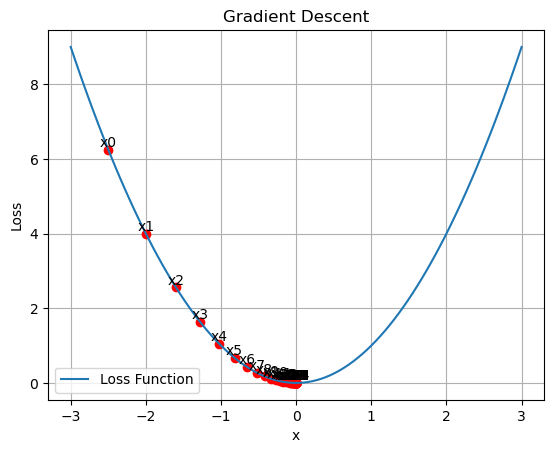

In [2]:
# 손실 함수 정의 (예시로 y = x^2를 사용)
def loss_function(x):
    return x**2

# 손실 함수 그래프를 그리기 위한 x 값 범위 설정
x_range = np.linspace(-3, 3, 100)
y_values = loss_function(x_range)

# 경사 하강법 파라미터 설정
learning_rate = 0.05  # 학습률
num_iterations = 100  # 반복 횟수
current_x = -2.5      # 초기 위치
history_x = [current_x]

# 경사 하강법 반복
for i in range(num_iterations):
    plt.text(current_x, loss_function(current_x), "x%d"%i, ha='center', va='bottom', fontsize=10)
    plt.plot(current_x, loss_function(current_x), c='r', marker='o')
    gradient = 4 * current_x
    current_x -= learning_rate * gradient
    history_x.append(current_x)

# 그래프 그리기
plt.plot(x_range, y_values, label='Loss Function')
plt.xlabel('x')
plt.ylabel('Loss')
plt.legend()
plt.title('Gradient Descent')
plt.grid()
plt.show()

## Gradient Descent의 한계점

### 1) 학습률에 민감하다.

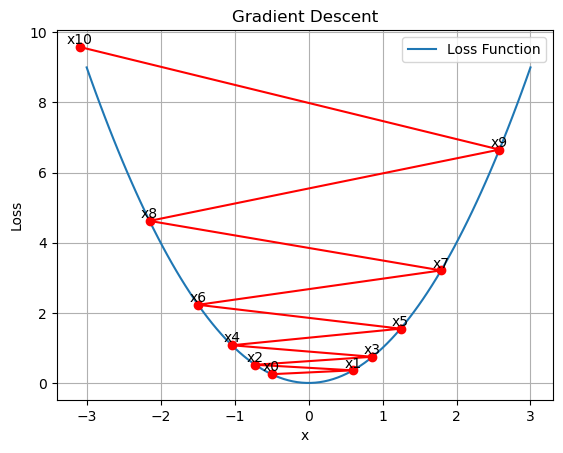

In [3]:
# 손실 함수 정의 (예시로 y = x^2를 사용)
def loss_function(x):
    return x**2

# 손실 함수 그래프를 그리기 위한 x 값 범위 설정
x_range = np.linspace(-3, 3, 100)
y_values = loss_function(x_range)

# 경사 하강법 파라미터 설정
learning_rate = 1.1  # 학습률
num_iterations = 10  # 반복 횟수
current_x = -0.5      # 초기 위치
history_x = [current_x]

# 경사 하강법 반복
for i in range(num_iterations):
    plt.text(current_x, loss_function(current_x), "x%d"%i, ha='center', va='bottom', fontsize=10)
    gradient = 2 * current_x
    current_x -= learning_rate * gradient
    history_x.append(current_x)

# 그래프 그리기
plt.plot(x_range, y_values, label='Loss Function')
plt.text(current_x, loss_function(current_x), "x%d"%(num_iterations), ha='center', va='bottom', fontsize=10)
plt.plot(history_x, [loss_function(x) for x in history_x], c='r', marker='o')
plt.xlabel('x')
plt.ylabel('Loss')
plt.legend()
plt.title('Gradient Descent')
plt.grid()
plt.show()

### 2) Saddle Point를 벗어나기 힘들다

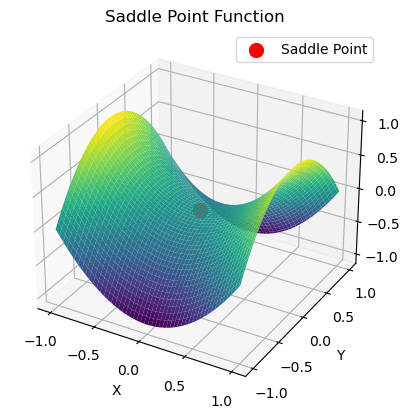

In [4]:
# Saddle Point Function
def saddle_point_function(x, y):
    return x**2 - y**2

# Create a grid of x and y values
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = saddle_point_function(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Mark the saddle point (0, 0, 0)
saddle_x = 0
saddle_y = 0
saddle_z = saddle_point_function(saddle_x, saddle_y)
ax.scatter(saddle_x, saddle_y, saddle_z, color='red', s=100, label='Saddle Point')

# Label axes and add a title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Saddle Point Function')

# Display the legend
ax.legend()

# Show the 3D plot
plt.show()

Final Point: (0.9223372036854777, -38.337599924474745, -1468.9208620517836)


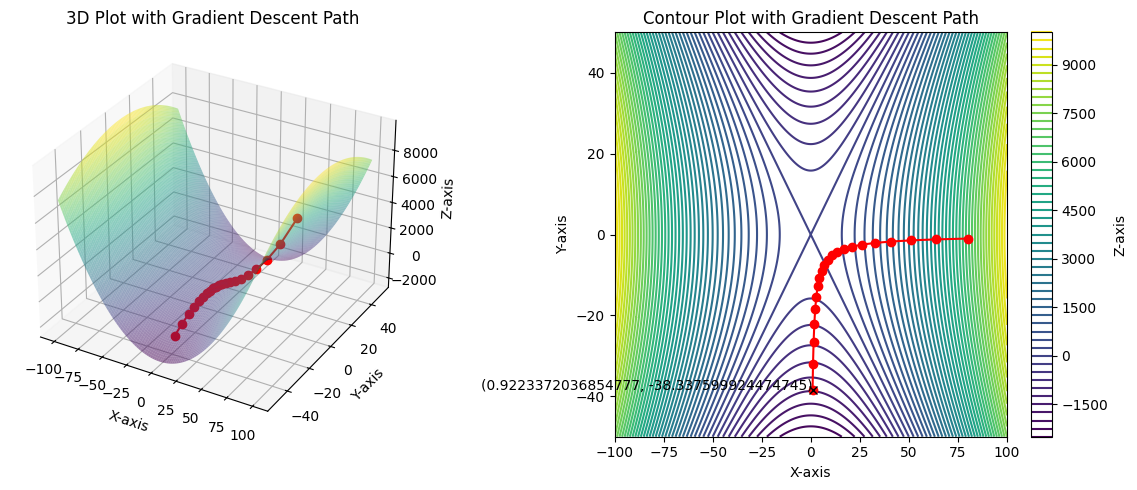

In [3]:
# 함수 정의
def func(x, y):
    return x**2 - y**2

# 편미분 함수 정의
def partial_derivative_x(x, y):
    return 2 * x

def partial_derivative_y(x, y):
    return -2 * y

# 경사하강법 함수 정의
def gradient_descent(x, y, learning_rate, num_iterations):
    path = [(x, y, func(x, y))]  # 경로 저장을 위한 리스트

    for _ in range(num_iterations):
        x = x - learning_rate * partial_derivative_x(x, y)
        y = y - learning_rate * partial_derivative_y(x, y)
        path.append((x, y, func(x, y)))

    return path

# 초기값 설정
initial_x = 80.0
initial_y = -1.0
learning_rate = 0.1
num_iterations = 20

# 경사하강법 경로 계산
path = gradient_descent(initial_x, initial_y, learning_rate, num_iterations)
path = np.array(path)

# 2D 그리드 생성
x = np.linspace(-100, 100, 1000)
y = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# 3D 그래프 생성
fig = plt.figure(figsize=(12, 5))

# 첫 번째 서브플롯: 3D 플롯
ax1 = fig.add_subplot(121, projection='3d')

# 표면 플로팅
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, rstride=10, cstride=10)

# 경로 플로팅
ax1.plot(path[:, 0], path[:, 1], path[:, 2], color='red', marker='o')

# 마지막 점의 좌표 출력
final_x, final_y, final_z = path[-1]
print(f"Final Point: ({final_x}, {final_y}, {final_z})")

# 축 레이블 추가
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
ax1.set_title('3D Plot with Gradient Descent Path')

# 두 번째 서브플롯: 등고선 플롯
ax2 = fig.add_subplot(122)

# 등고선 플로팅
contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')

# 경로 플로팅
ax2.plot(path[:, 0], path[:, 1], color='red', marker='o')

# 마지막 점의 좌표 출력
ax2.plot(final_x, final_y, marker='x', color='black')
ax2.text(final_x, final_y, f'({final_x}, {final_y})', ha='right')

# 축 레이블 추가
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_title('Contour Plot with Gradient Descent Path')

# 컬러바 추가
cbar = fig.colorbar(contour, ax=ax2)
cbar.set_label('Z-axis')

# 그래프 표시
plt.tight_layout()
plt.show()


- 안장점은 한 방향에서는 극소이지만 한 방향에서는 극대인 지점을 의미한다
- 안장점에서의 gradient 값이 0이므로 점이 더이상 업데이트 되지 않고 안장점에 국한된다
- 위 함수 $z=x^2-y^2$은 (0,0,0)에서 안장점을 가진다
- 편미분 결과 x축에서는 극소점이고 y축에서는 극대점이므로 경사하강법을 하면 x좌표는 0에 수렴하지만 y좌표는 절댓값이 커진다
- 하지만 초기 y좌표가 0이라면 편미분값이 0이므로 y좌표가 안장점에서 벗어나지 못한다

Final Point: (0.9223372036854777, 0.0, 0.8507059173023463)


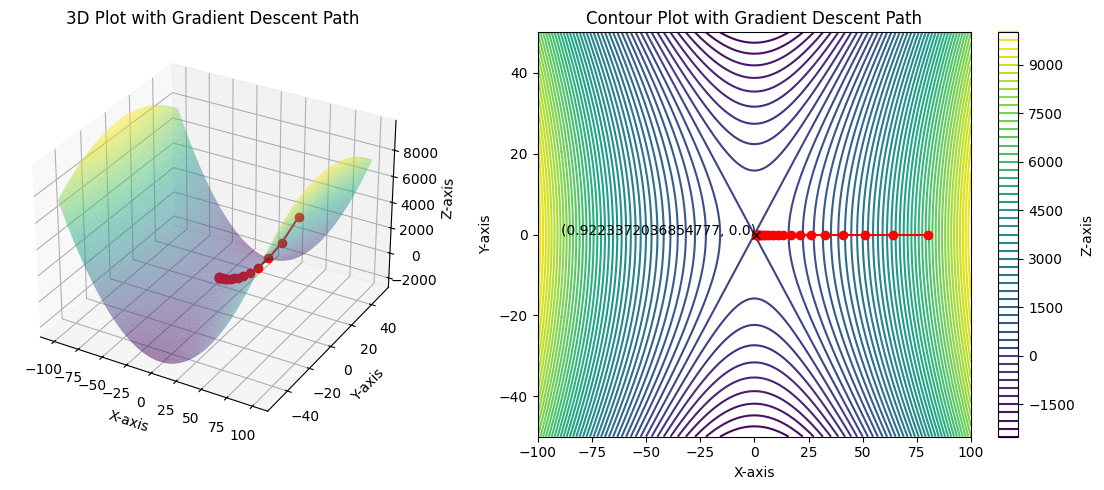

In [4]:
# 함수 정의
def func(x, y):
    return x**2 - y**2

# 편미분 함수 정의
def partial_derivative_x(x, y):
    return 2 * x

def partial_derivative_y(x, y):
    return -2 * y

# 경사하강법 함수 정의
def gradient_descent(x, y, learning_rate, num_iterations):
    path = [(x, y, func(x, y))]  # 경로 저장을 위한 리스트

    for _ in range(num_iterations):
        x = x - learning_rate * partial_derivative_x(x, y)
        y = y - learning_rate * partial_derivative_y(x, y)
        path.append((x, y, func(x, y)))

    return path

# 초기값 설정
initial_x = 80.0
initial_y = 0
learning_rate = 0.1
num_iterations = 20

# 경사하강법 경로 계산
path = gradient_descent(initial_x, initial_y, learning_rate, num_iterations)
path = np.array(path)

# 2D 그리드 생성
x = np.linspace(-100, 100, 1000)
y = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# 3D 그래프 생성
fig = plt.figure(figsize=(12, 5))

# 첫 번째 서브플롯: 3D 플롯
ax1 = fig.add_subplot(121, projection='3d')

# 표면 플로팅
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5, rstride=10, cstride=10)

# 경로 플로팅
ax1.plot(path[:, 0], path[:, 1], path[:, 2], color='red', marker='o')

# 마지막 점의 좌표 출력
final_x, final_y, final_z = path[-1]
print(f"Final Point: ({final_x}, {final_y}, {final_z})")

# 축 레이블 추가
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
ax1.set_title('3D Plot with Gradient Descent Path')

# 두 번째 서브플롯: 등고선 플롯
ax2 = fig.add_subplot(122)

# 등고선 플로팅
contour = ax2.contour(X, Y, Z, levels=50, cmap='viridis')

# 경로 플로팅
ax2.plot(path[:, 0], path[:, 1], color='red', marker='o')

# 마지막 점의 좌표 출력
ax2.plot(final_x, final_y, marker='x', color='black')
ax2.text(final_x, final_y, f'({final_x}, {final_y})', ha='right')

# 축 레이블 추가
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_title('Contour Plot with Gradient Descent Path')

# 컬러바 추가
cbar = fig.colorbar(contour, ax=ax2)
cbar.set_label('Z-axis')

# 그래프 표시
plt.tight_layout()
plt.show()


### 3) Local Minimum에 빠지기 쉽다.

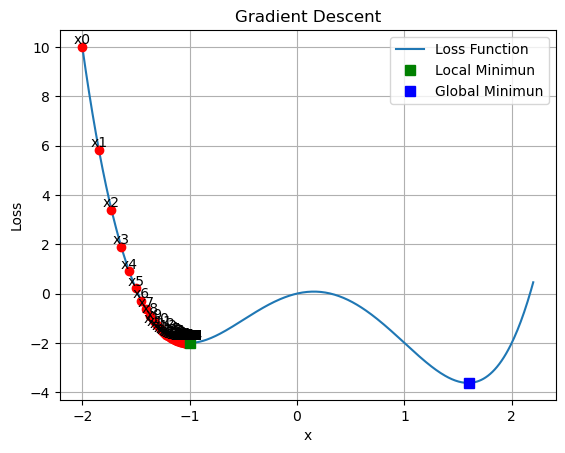

최소값의 x:	-1.00
최소값의 손실:	-2.00


In [5]:
# 손실 함수 정의
def loss_function(x):
    return x**4 - x**3 - 3*x**2 + x

# 그래프를 그릴 x 값 범위 설정
x = np.linspace(-2, 2.2, 400)
y = loss_function(x)

# 초기 위치 설정
current_x = -2

# 학습률 설정
learning_rate = 0.005

# 그래프 그리기
plt.plot(x, y, label="Loss Function")
plt.xlabel("x")
plt.ylabel("Loss")
plt.title("Gradient Descent")

# 경사 하강법 반복
max_iterations = 100
for i in range(max_iterations):
    plt.text(current_x, loss_function(current_x), "x%d"%i, ha='center', va='bottom', fontsize=10)
    plt.plot(current_x, loss_function(current_x), 'ro')  # 현재 위치를 동그라미로 표시
    gradient = 4*current_x**3 - 3*current_x**2 - 6*current_x + 1  # 손실 함수의 도함수 (경사)
    current_x = current_x - learning_rate * gradient  # 경사 하강법 업데이트

plt.plot(-1, loss_function(-1), 'gs',markersize=7,label='Local Minimun')
plt.plot(1.6, loss_function(1.6), 'bs',markersize=7,label='Global Minimun')  # 최소값을 네모로 표시
plt.legend()
plt.grid()
plt.show()

print("최소값의 x:\t%0.2f"%current_x)
print("최소값의 손실:\t%0.2f"%loss_function(current_x))

# 2. Momentum(관성)

1. Momentum은 경사 하강법의 한계점을 개선할 수 있는 심화 최적화 기법(Global Minimum을 잘 찾음)
2. Momentum의 원리는 공이 경사를 내려갈 때 관성으로 인해 계속해서 가는 성질을 고안하여 경사 하강법에 관성을 부여
3. $v_t=$$\gamma$$v_{t-1}+$$\eta$$\nabla$$f(x_{t-1})$
    * $v_t$: $t$번째 $x$의 이동 벡터
    * $\gamma$: 관성계수
    * $\eta$: 학습률
4. $x_t=x_{t-1}-v_t$
5. overshooting 될 가능성이 있다.
    * Gradient가 큰 곳에서 시작할 경우 관성을 이기지 못하고 벗어나는 현상
    * overshooting을 해결하기 위해 Nesterov momentum이 있다.

## Momentum

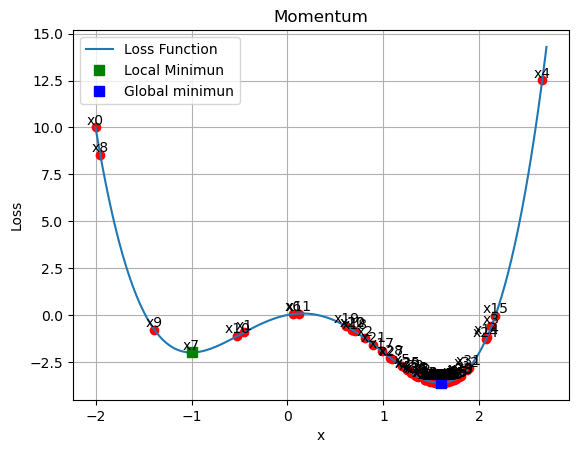

x2:  0.81	x2의 손실: -1.25
x3:  2.13	x3의 손실: -0.61
x4:  2.66	x4의 손실: 12.51
x5:  1.19	x5의 손실: -2.74
x6:  0.05	x6의 손실: 0.05
x7:  -1.00	x7의 손실: -2.00

최소값의 x: 	1.60
최소값의 손실: 	-3.62


In [6]:
# 손실 함수 정의
def loss_function(x):
    return x**4 - x**3 - 3*x**2 + x

# 손실 함수의 도함수 정의
def gradient(x):
    return 4*x**3 - 3*x**2 - 6*x + 1

# 초기값 설정
x = -2
learning_rate = 0.05
momentum = 0.9
num_iterations = 100

# 그래프를 위한 초기화
x_values = []
loss_values = []

# 경사 하강법 with momentum 적용
velocity = 0
for i in range(num_iterations):
    plt.text(x, loss_function(x), "x%d"%i, ha='center', va='bottom', fontsize=10)
    plt.plot(x, loss_function(x), marker='o', color='r')
    x_values.append(x)
    loss = loss_function(x)
    loss_values.append(loss)

    # Momentum 업데이트
    velocity = momentum * velocity - learning_rate * gradient(x)
    x += velocity

# 그래프 그리기
x_range = np.linspace(-2, 2.7, 400)
plt.plot(x_range, loss_function(x_range), label="Loss Function")
plt.plot(-1, loss_function(-1), 'gs',markersize=7,label='Local Minimun')
plt.plot(1.6, loss_function(1.6), 's', markersize=7, color='b',label='Global minimun')

plt.xlabel("x")
plt.ylabel("Loss")
plt.legend()
plt.title("Momentum")
plt.grid()
plt.show()

for i in range(2,8):
    print("x%d: "%(i), "%0.2f"%x_values[i],end='\t')
    print("x%d의 손실:"%(i), "%0.2f"%loss_values[i])
print('')
print("최소값의 x: \t%0.2f"%x)
print("최소값의 손실: \t%0.2f"%loss)

## overshooting

학습 과정에서 가중치 업데이트가 너무 크게 이루어져서 최적화를 불안정하게 하는 현상

즉, Gradient가 큰 곳에서 시작할 경우 관성을 이기지 못하고 최소 지점을 지나쳐 버리는 현상

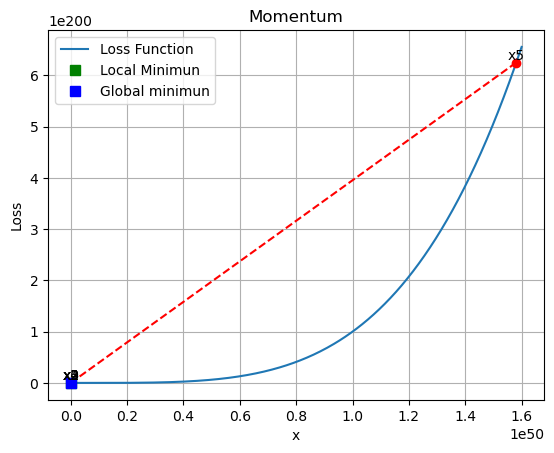

최소값의 x: 	-790538613975678488599074948842550015800564060894096706448377217077863539860905910261308855052964926120237145241048032490001140471103932222426553778176.00
최소값의 손실: 	624967533036079354093780178338612198675916469653086002583587129659201991114490638306028634341716329995968908127985147704245122123613225492206927051340180319941690521769244760017648759979136028550103040.00


In [3]:
# 손실 함수 정의
def loss_function(x):
    return x**4 - x**3 - 3*x**2 + x

# 손실 함수의 도함수 정의
def gradient(x):
    return 4*x**3 - 3*x**2 - 6*x + 1

# 초기값 설정
x = -4
learning_rate = 0.05
momentum = 0.9
num_iterations = 6

# 그래프를 위한 초기화
x_values = []
loss_values = []

# 경사 하강법 with momentum 적용
velocity = 0
for i in range(num_iterations):
    plt.text(x, loss_function(x), "x%d"%i, ha='center', va='bottom', fontsize=10)
    x_values.append(x)
    loss = loss_function(x)
    loss_values.append(loss)

    # Momentum 업데이트
    velocity = momentum * velocity - learning_rate * gradient(x)
    x += velocity

# 그래프 그리기
x_range = np.linspace(-150, 1.6*10**50, 400)
plt.plot(x_range, loss_function(x_range), label="Loss Function")
plt.plot(x_values, loss_values, marker='o', color='r', linestyle='--')
plt.plot(-1, loss_function(-1), 'gs',markersize=7,label='Local Minimun')
plt.plot(1.6, loss_function(1.6), 's', markersize=7, color='b',label='Global minimun')

plt.xlabel("x")
plt.ylabel("Loss")
plt.legend()
plt.title("Momentum")
plt.grid()
plt.show()

print("최소값의 x: \t%0.2f"%x)
print("최소값의 손실: \t%0.2f"%loss)

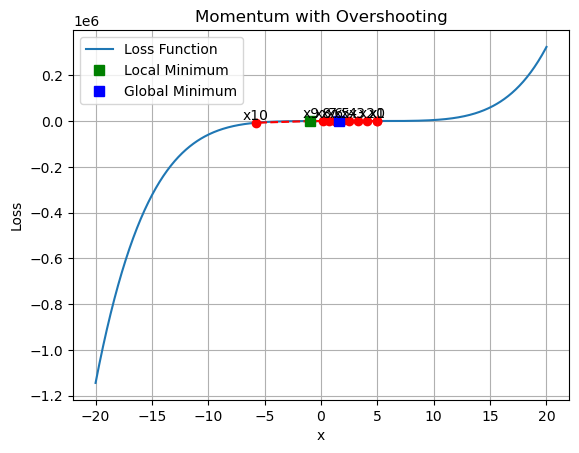

최소값의 x: 	-186.59
최소값의 손실: 	-7293.99


In [4]:
# 손실 함수 정의
def loss_function(x):
    return (6*x**5 - 75*x**4 + 350*x**3 - 750*x**2 + 720*x)/30

# 손실 함수의 도함수 정의
def gradient(x):
    return x**4 - 10*x**3 + 35*x**2 - 50*x + 24

# 초기값 설정
x = 5
learning_rate = 0.039
momentum = 0.9
num_iterations = 11  #횟수를 늘리면 발산하는 것을 볼수 있음
                     #범위도 함께 늘려야 함


# 그래프를 위한 초기화
x_values = []
loss_values = []

# 경사 하강법 with momentum 적용
velocity = 1
for i in range(num_iterations):
    plt.text(x, loss_function(x), "x%d"%i, ha='center', va='bottom', fontsize=10)
    x_values.append(x)
    loss = loss_function(x)
    loss_values.append(loss)

    # Momentum 업데이트
    velocity = momentum * velocity - learning_rate * gradient(x)
    x += velocity

# 그래프 그리기
x_range = np.linspace(-20, 20, 600)
plt.plot(x_range, loss_function(x_range), label="Loss Function")
plt.plot(x_values, loss_values, marker='o', color='r', linestyle='--')
plt.plot(-1, loss_function(-1), 'gs', markersize=7, label='Local Minimum')
plt.plot(1.6, loss_function(1.6), 's', markersize=7, color='b', label='Global Minimum')

plt.xlabel("x")
plt.ylabel("Loss")
plt.legend()
plt.title("Momentum with Overshooting")
plt.grid()
plt.show()

print("최소값의 x: \t%0.2f"%x)
print("최소값의 손실: \t%0.2f"%loss)